In [241]:
import pandas as pd
import datetime as dt
import pandasql as ps
import os
import zipfile as zp
from datetime import datetime
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

DIR=r'C:\Users\anuj\Downloads'
ZIp='archive (8).zip'

os.chdir(DIR)
zf = zp.ZipFile(f'{ZIp}')

dfs={}
for name in zf.namelist():
    df_name= name.replace('.csv','')
    dfs[df_name]=pd.read_csv(zf.open(name,mode='r'),encoding='latin')

df=dfs['LS_2.0']
df.columns=df.columns.str.replace(' ','_')
df.columns=df.columns.str.replace('\n','_')
df['LIABILITIES']=df['LIABILITIES'].astype(str).apply(lambda x: x.replace('\n','-'))
df['ASSETS']=df['ASSETS'].astype(str).apply(lambda x: x.replace('\n','-'))
df['CRIMINAL_CASES']=df['CRIMINAL_CASES'].astype(str).apply(lambda x: x.replace('Not Available','0'))
df['CRIMINAL_CASES']=df['CRIMINAL_CASES'].apply(lambda x: float(x))
df['EDUCATION']=df['EDUCATION'].astype(str).apply(lambda x: x.replace('\n',''))

#os.chdir(r'C:\Users\anuj\Documents\My Tableau Repository\Datasources')
#df.to_csv('indian_elections.csv',index=False)

### Null and Duplicate Checks

In [2]:
df[df.duplicated()]## Check duplicates
df.isnull().values.any() ########Check NUlls
df.isnull().isnull().sum() ########Check NUlls by each column

STATE                                       0
CONSTITUENCY                                0
NAME                                        0
WINNER                                      0
PARTY                                       0
SYMBOL                                      0
GENDER                                      0
CRIMINAL_CASES                              0
AGE                                         0
CATEGORY                                    0
EDUCATION                                   0
ASSETS                                      0
LIABILITIES                                 0
GENERAL_VOTES                               0
POSTAL_VOTES                                0
TOTAL_VOTES                                 0
OVER_TOTAL_ELECTORS__IN_CONSTITUENCY        0
OVER_TOTAL_VOTES_POLLED__IN_CONSTITUENCY    0
TOTAL_ELECTORS                              0
dtype: int64

### # Constituencies by State

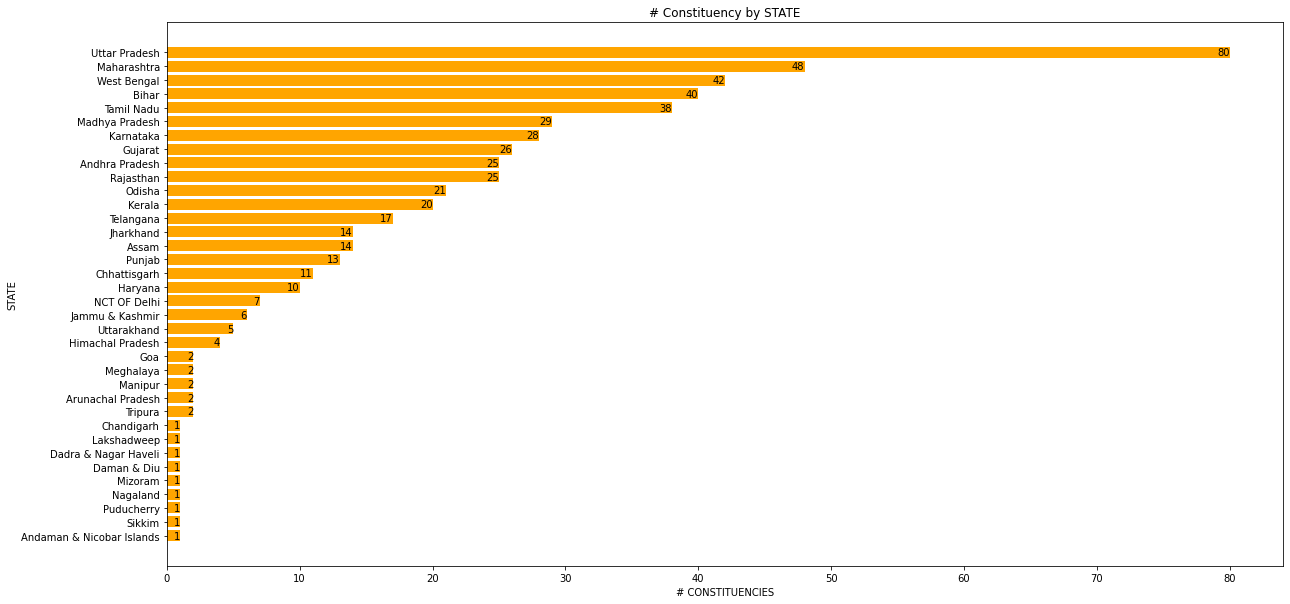

In [3]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(x=x[i],y=y[i],s=x[i],fontsize=10,va='center',ha='right',color='black')

const=pd.DataFrame(df['CONSTITUENCY'].groupby(df['STATE']).nunique()).sort_values(by='CONSTITUENCY',ascending=True)
const['STATE']=const.index
fig=plt.gcf()
fig.set_size_inches(20,10)
y=const['STATE']
x=const['CONSTITUENCY']
plt.barh(y=y,width=x,height=0.8,color='orange')
plt.title('# Constituency by STATE')
plt.ylabel('STATE')
plt.xlabel('# CONSTITUENCIES')
addlabels(x,y)
plt.show()

In [4]:
type(const)

pandas.core.frame.DataFrame

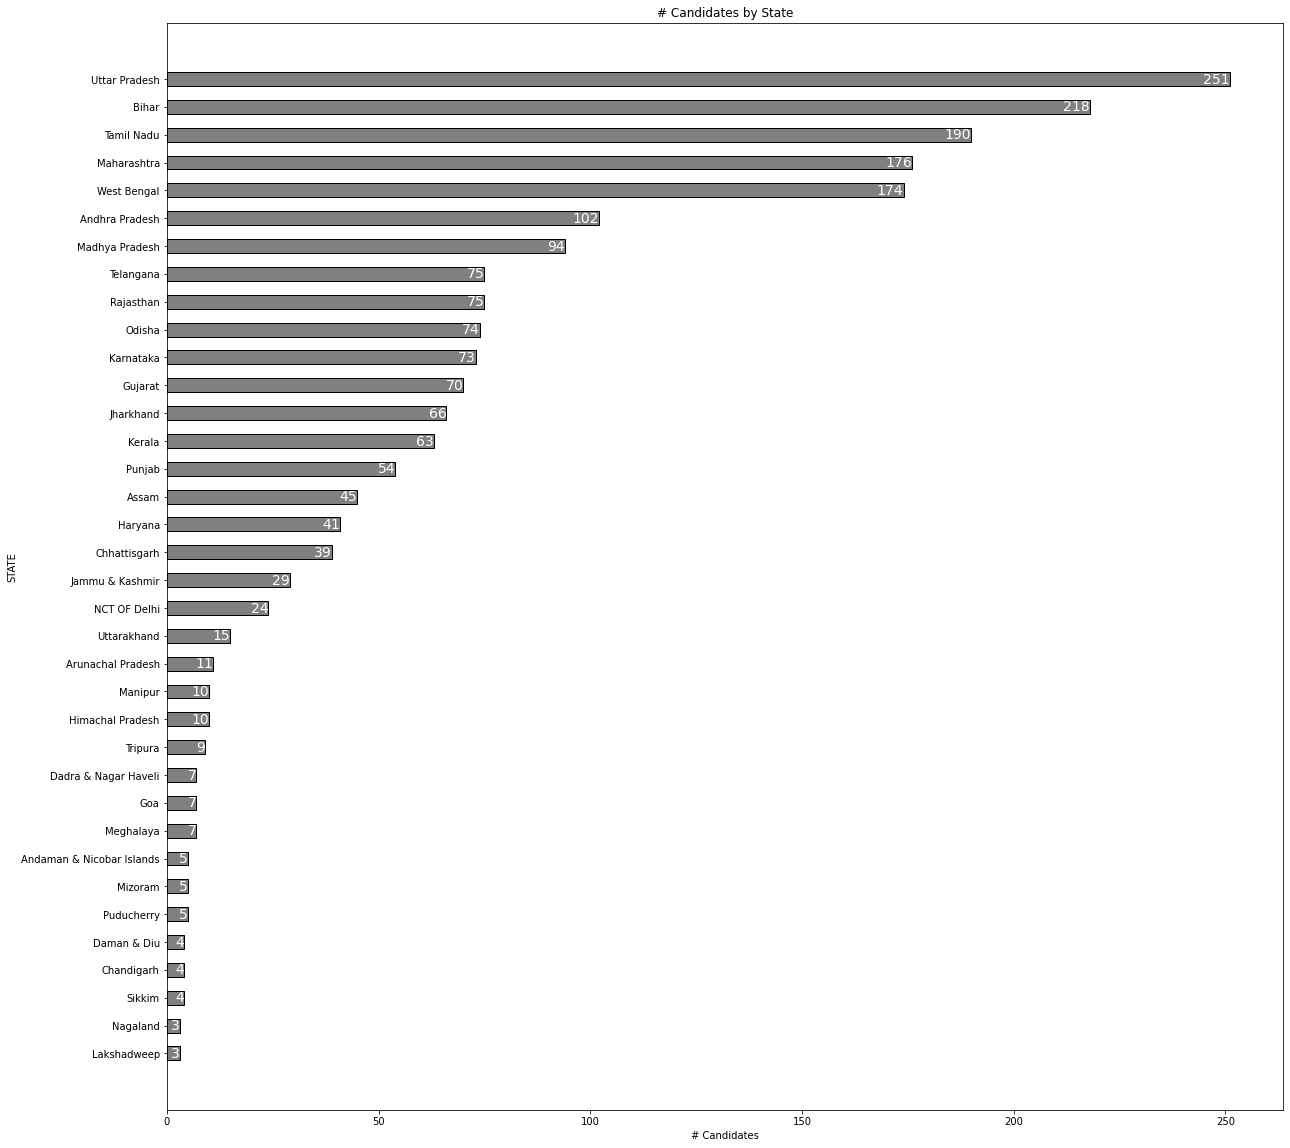

In [5]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(x=x[i],y=y[i],s=x[i],fontsize=14,va='center',ha='right',color='white')

const=pd.DataFrame(df['NAME'].groupby(df['STATE']).nunique()).sort_values(by='NAME',ascending=True)
const['STATE']=const.index
fig=plt.gcf()
fig.set_size_inches(20,20)
y=const['STATE']
x=const['NAME']
plt.barh(y=y,width=x,height=0.5,fc='gray',ec='black')
plt.title('# Candidates by State')
plt.ylabel('STATE')
plt.xlabel('# Candidates')
addlabels(x,y)
plt.show()


### 1. How many candidates have criminial cases and have won elections in 2019? Which state has maximum?

In [275]:
q1=df[['NAME','CRIMINAL_CASES','WINNER','STATE']]

q1.loc[q1['CRIMINAL_CASES'] >0, 'is_criminal'] = 1
q1.loc[q1['CRIMINAL_CASES'] ==0, 'is_criminal'] = 0

print("How many candidates have criminial cases and have won elections in 2019?: ",q1['NAME'].groupby([q1['is_criminal'],q1['WINNER']]).nunique().unstack().iloc[1,1])
print("Which state has maximum criminal winners: ",q1[(q1['WINNER']==1)&(q1['is_criminal']==1)]['NAME'].groupby([q1['STATE']]).nunique().sort_values(ascending=False).head(1))

How many candidates have criminial cases and have won elections in 2019?:  233
Which state has maximum criminal winners:  STATE
Uttar Pradesh    42
Name: NAME, dtype: int64


C:\Users\anuj\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\anuj\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### 2. Are there any female candidates with criminal cases ? which state shows this trend

STATE with maximum criminal female candidates:                 NAME
STATE              
Uttar Pradesh    16
STATE with least criminal female candidates:         NAME
STATE      
Assam     1


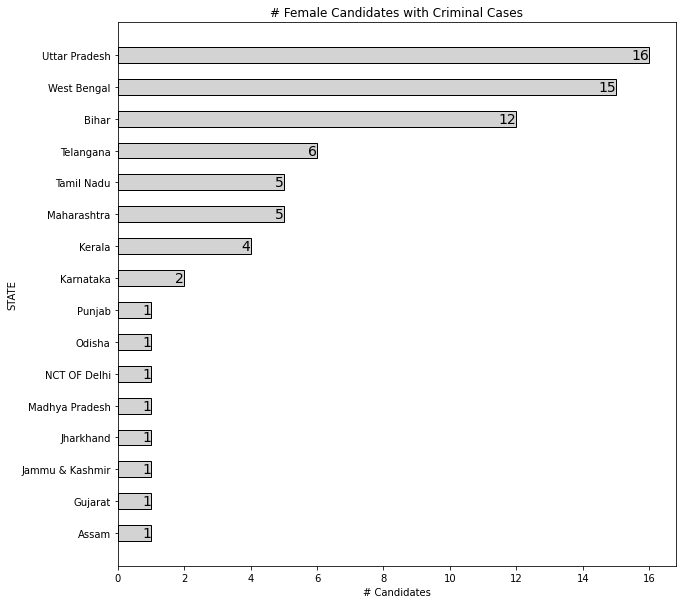

In [7]:
q1=df[['NAME','CRIMINAL_CASES','WINNER','STATE','GENDER']]
q1.loc[q1['CRIMINAL_CASES'] >0, 'is_criminal'] = 1
q1.loc[q1['CRIMINAL_CASES'] ==0, 'is_criminal'] = 0

print('STATE with maximum criminal female candidates: ',pd.DataFrame(q1[(q1['is_criminal']==1)&(q1['GENDER']=='FEMALE')]['NAME'].groupby([q1['STATE']]).nunique().sort_values(ascending=False)).head(1))
print('STATE with least criminal female candidates: ',pd.DataFrame(q1[(q1['is_criminal']==1)&(q1['GENDER']=='FEMALE')]['NAME'].groupby([q1['STATE']]).nunique().sort_values(ascending=True)).head(1))

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(x=x[i],y=y[i],s=x[i],fontsize=14,va='center',ha='right',color='black')

q2=pd.DataFrame(q1[(q1['is_criminal']==1)&(q1['GENDER']=='FEMALE')]['NAME'].groupby([q1['STATE']]).nunique().sort_values(ascending=True))
q2['STATE']=q2.index
q2=q2.reset_index(drop=True)
fig=plt.gcf()
fig.set_size_inches(10,10)
y=q2['STATE']
x=q2['NAME']
plt.barh(y=y,width=x,height=0.5,fc='lightgray',ec='black')
plt.title('# Female Candidates with Criminal Cases')
plt.ylabel('STATE')
plt.xlabel('# Candidates')
addlabels(x,y)
plt.show()




### 3. Which state has maximum old candidates? and whats the average age?

In [8]:
q1=df[['NAME','AGE','STATE','GENDER']]

pd.DataFrame(q1['AGE'].groupby([q1['STATE']]).mean().sort_values(ascending=False)).iloc[0:1,0]

STATE
Chandigarh    64.5
Name: AGE, dtype: float64

### 4. How many parties are there at National Level? Represent Them on a pie . Slices to be based on # Candidates

Number of Parties at National Level:  133
Top 10 Parties account for  74.5% . Rest 25.5%  is accounted by 123 Parties


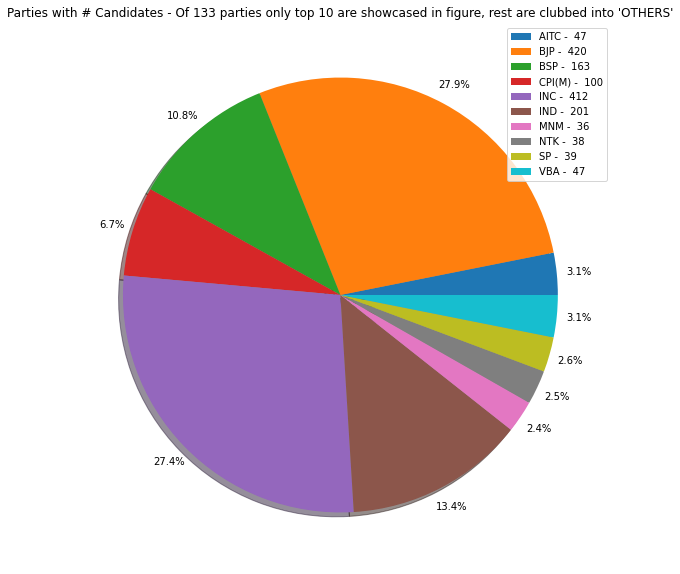

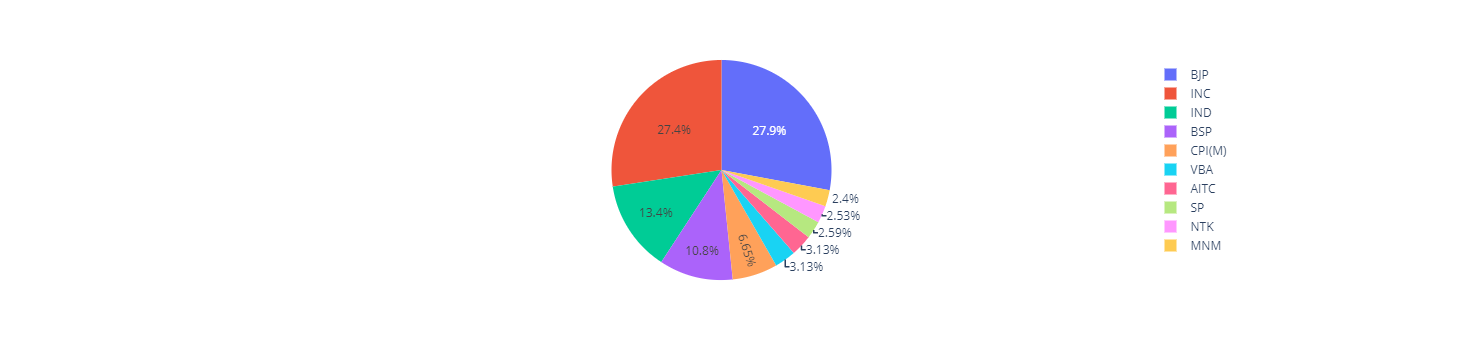

In [26]:

print('Number of Parties at National Level: ',df.PARTY.nunique())


fig=plt.gcf()
fig.set_size_inches(15,10)

q5=pd.DataFrame(df.groupby('PARTY')['NAME'].nunique().rank(ascending=False).sort_values(ascending=True))
q5['PARTY']=q5.index  
q5=q5.reset_index(drop=True)
q5=q5.join(pd.DataFrame(df.groupby('PARTY')['NAME'].nunique()),on='PARTY',how='left',lsuffix='_RANK')
q5.loc[q5['NAME_RANK'] >10, 'PARTY'] = 'OTHERS'

#q5.groupby(['PARTY'])['NAME'].sum().plot(kind='pie',subplots=True,figsize=(10,10))
plt.pie(x=q5[q5['PARTY']!='OTHERS'].groupby(['PARTY'])['NAME'].sum(),shadow=True,autopct='%1.1f%%', pctdistance=1.1, labeldistance=1.2)
plt.title("Parties with # Candidates - Of 133 parties only top 10 are showcased in figure, rest are clubbed into 'OTHERS'")
plt.legend(pd.DataFrame(q5[q5['PARTY']!='OTHERS'].groupby(['PARTY'])['NAME'].sum()).index + ' -  ' + (q5[q5['PARTY']!='OTHERS'].groupby(['PARTY'])['NAME'].sum()).astype(str))
print('Top 10 Parties account for ', "{:.1%}".format(((q5[q5['PARTY']!='OTHERS']['NAME'].sum())/q5['NAME'].sum())),'. Rest', "{:.1%}".format(((q5[q5['PARTY']=='OTHERS']['NAME'].sum())/q5['NAME'].sum())),' is accounted by 123 Parties' )
plt.show()


px.pie(q5[q5['PARTY']!='OTHERS'],names='PARTY',values='NAME',color='PARTY',hover_data=q5.columns,labels='NAME')


### 5. Which state has most qualified Candidates?

In [320]:
q5= pd.DataFrame(df.groupby(['STATE','EDUCATION'])['NAME'].nunique()).reset_index()
q5.set_index(['STATE','EDUCATION'])['NAME'].unstack().fillna(0).reset_index()[['STATE','Post Graduate']].sort_values(by='Post Graduate',ascending=False).reset_index(drop=True).loc[0:0]

EDUCATION,STATE,Post Graduate
0,Tamil Nadu,64.0


### 6. Which party has most Gen category candidates?

In [328]:
qual= pd.DataFrame(df.groupby(['PARTY','CATEGORY'])['NAME'].nunique()).sort_values(by='NAME').reset_index()

print(qual.set_index(['PARTY','CATEGORY'])['NAME'].unstack().fillna(0).reset_index()[['PARTY','GENERAL']].sort_values(by='GENERAL',ascending=False).reset_index(drop=True))


print(qual.groupby('CATEGORY')['NAME'].sum())

CATEGORY   PARTY  GENERAL
0            BJP    304.0
1            INC    290.0
2            IND    136.0
3            BSP     80.0
4         CPI(M)     73.0
..           ...      ...
127         BSCP      0.0
128         BRPI      0.0
129         MOSP      0.0
130         BLSD      0.0
131         BOPF      0.0

[132 rows x 2 columns]
CATEGORY
GENERAL    1391
SC          383
ST          243
Name: NAME, dtype: int64


### 7. Which state has the richest candidates? Which party do they belong to?

In [491]:
q7=pd.DataFrame(df.groupby(['STATE','ASSETS','PARTY'])['NAME'].nunique()).sort_values(by='NAME').reset_index()
q7['ASSETS']=q7['ASSETS'].str.split("~",expand=True)[0]
q7['ASSETS']=q7['ASSETS'].str.split("-",expand=True)[0]
q7['ASSETS']=q7['ASSETS'].str.replace('-','')
q7['ASSETS']=q7['ASSETS'].str.replace('Rs ','')
q7['ASSETS']=q7['ASSETS'].str.replace(',','')
q7['ASSETS']=q7['ASSETS'].str.replace('Not Available','')
q7['ASSETS']=q7['ASSETS'].str.replace('Nil','')
q7['ASSETS']=q7['ASSETS'].str.replace('nan','')
q7['ASSETS']=q7['ASSETS'].str.replace(' ','')
q7['ASSETS']=q7['ASSETS'].str.replace('`','')
q7['ASSETS']=pd.to_numeric(q7['ASSETS'])

q8=pd.DataFrame(q7.groupby(['STATE','PARTY'])['ASSETS'].sum()).sort_values(by='ASSETS',ascending=False).reset_index()                                                           
q8.query('STATE=="Uttar Pradesh"').reset_index(drop=True)

,STATE,PARTY,ASSETS
0,Uttar Pradesh,BJP,1.290042e+10
1,Uttar Pradesh,INC,8.632163e+09
2,Uttar Pradesh,SP,7.738192e+09
3,Uttar Pradesh,BSP,6.656652e+09
4,Uttar Pradesh,RLD,6.579697e+08
5,Uttar Pradesh,JDL,1.946954e+08
6,Uttar Pradesh,IND,1.237462e+08
7,Uttar Pradesh,PSPL,1.210800e+08
8,Uttar Pradesh,SBSP,1.121011e+08
9,Uttar Pradesh,JANADIP,6.601800e+07


### 8. Which consituency was voted with highest NOTA?

In [499]:
pd.DataFrame(df.query('PARTY=="NOTA"')[['CONSTITUENCY','STATE','TOTAL_VOTES']].groupby(['CONSTITUENCY','STATE'])['TOTAL_VOTES'].sum()).sort_values(by='TOTAL_VOTES',ascending=False).reset_index().head(1)

,CONSTITUENCY,STATE,TOTAL_VOTES
0,GOPALGANJ (SC),Bihar,51660


### 9. In each state what is the turn-up percentage of voters?

Average Turnup Ratio : 17.4%


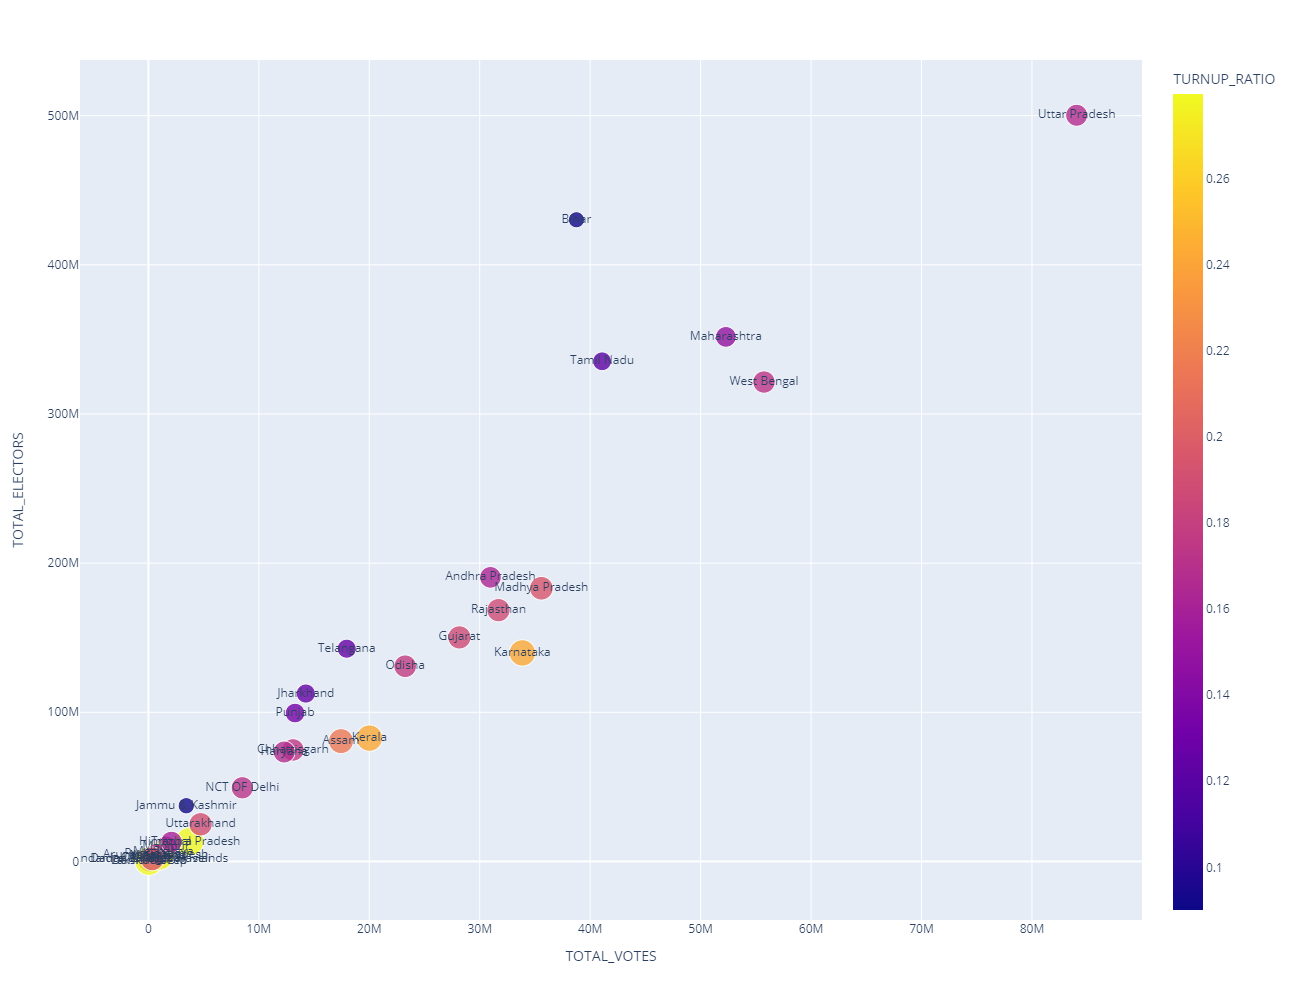

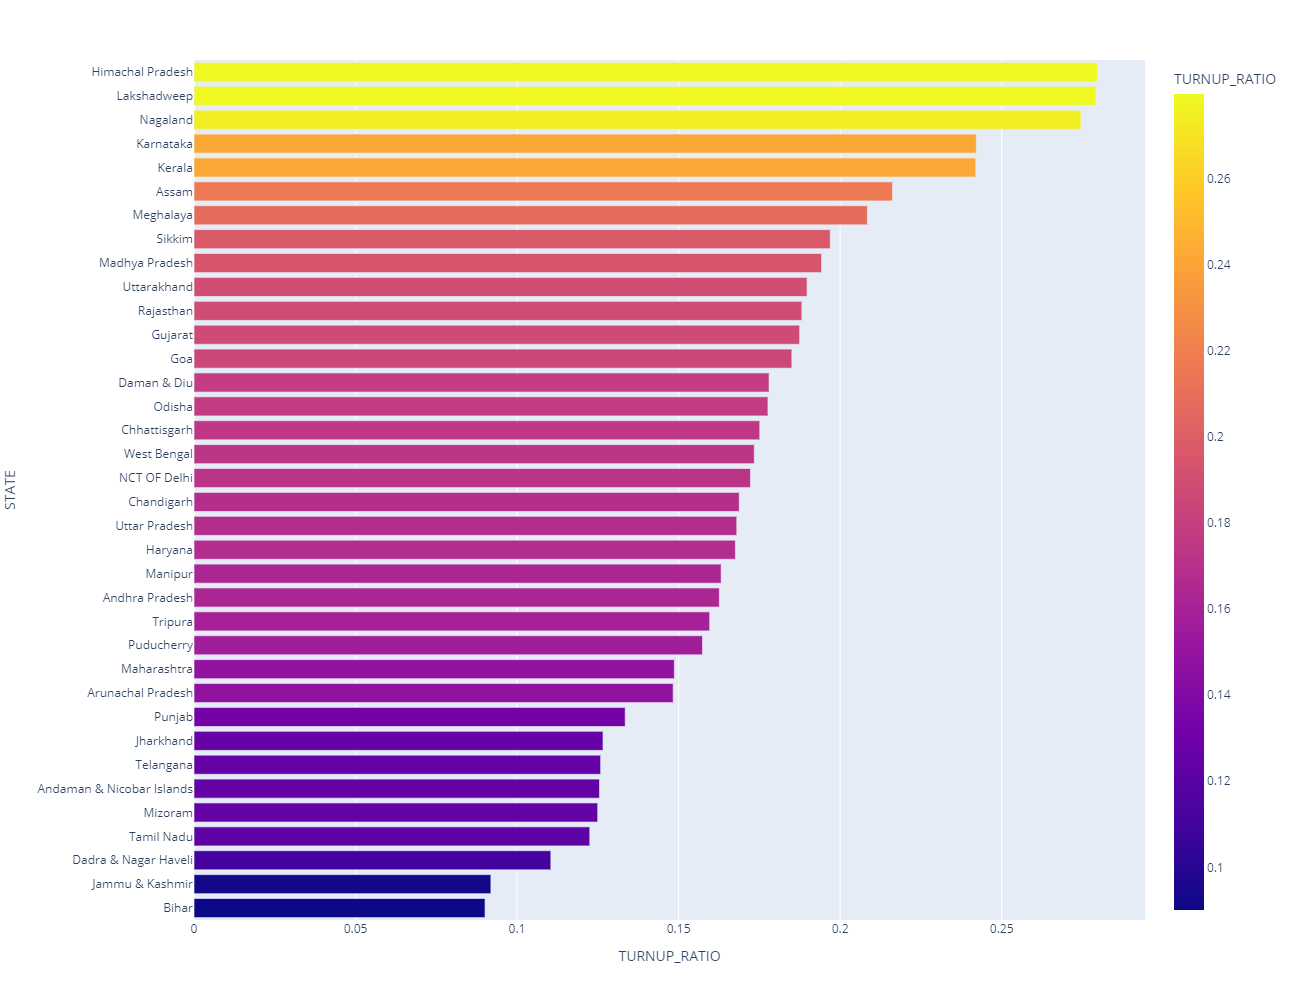

In [584]:
### Voter Turnup means how many electors are there in a state vs how many voted

q9=pd.merge(pd.DataFrame(df.groupby(['STATE'])['TOTAL_VOTES'].sum()).sort_values(by='STATE',ascending=True).reset_index(),pd.DataFrame(df.groupby(['STATE'])['TOTAL_ELECTORS'].sum()).sort_values(by='STATE',ascending=True).reset_index(),how='inner',on='STATE')
q9['TURNUP_RATIO']=q9['TOTAL_VOTES']/q9['TOTAL_ELECTORS']
fig=px.scatter(q9,x='TOTAL_VOTES',y='TOTAL_ELECTORS',color='TURNUP_RATIO',size='TURNUP_RATIO',hover_name='STATE',text='STATE',opacity=0.8,render_mode='auto',height=1000)
print('Average Turnup Ratio :',"{:.1%}".format(q9['TURNUP_RATIO'].mean()))
fig.show()
fig2= px.bar(q9[['STATE','TURNUP_RATIO']].sort_values(by='TURNUP_RATIO',ascending=True),x='TURNUP_RATIO',y='STATE',height=1000,color='TURNUP_RATIO')
fig2.show()

### 10. Which state has the highest #female candidates?

In [590]:
q10=df[['NAME','STATE','GENDER']].query("GENDER=='FEMALE'")
pd.DataFrame(q10.groupby('STATE')['NAME'].nunique()).rename(columns={'NAME':'FEMALE_CND_COUNT'}).sort_values(by='FEMALE_CND_COUNT',ascending=False).reset_index()

,STATE,FEMALE_CND_COUNT
0,West Bengal,37
1,Uttar Pradesh,34
2,Tamil Nadu,27
3,Bihar,21
4,Maharashtra,19
5,Odisha,16
6,Madhya Pradesh,13
7,Andhra Pradesh,11
8,Rajasthan,8
9,Telangana,8


### Are there any all male or all female candidates in a constituency?

In [596]:
qual= pd.DataFrame(df.groupby(['CONSTITUENCY','GENDER'])['NAME'].nunique()).rename(columns={'NAME':'CNT_CANDIDATES'}).sort_values(by='CNT_CANDIDATES',ascending=False).reset_index()
#qual['NAME'].fillna(0,inplace=True)
qual=qual.set_index(['CONSTITUENCY','GENDER'])['CNT_CANDIDATES'].unstack().fillna(0).reset_index()

print(qual[(qual['FEMALE']>0)&(qual['MALE']==0)]['CONSTITUENCY'].nunique(),'CONSTITUENCY with ONLY Female Candidates \n',qual[(qual['FEMALE']>0)&(qual['MALE']==0)]['CONSTITUENCY'])
print('\n',qual[(qual['MALE']>0)&(qual['FEMALE']==0)]['CONSTITUENCY'].nunique(),'CONSTITUENCY with ONLY Male Candidates \n',qual[(qual['MALE']>0)&(qual['FEMALE']==0)]['CONSTITUENCY'])



0 CONSTITUENCY with ONLY Female Candidates 
 Series([], Name: CONSTITUENCY, dtype: object)

 331 CONSTITUENCY with ONLY Male Candidates 
 0            ADILABAD
2          AHMADNAGAR
4      AHMEDABAD WEST
5               AJMER
7               AKOLA
            ...      
530      VIRUDHUNAGAR
532      VIZIANAGARAM
535           WAYANAD
536        WEST DELHI
538         ZAHIRABAD
Name: CONSTITUENCY, Length: 331, dtype: object


### 11. What is the correlation b/w #candidates and #consituency?

Same as question 24

### 12. Is there a scenario where in the states with low electors volume are using postal votes? Test the hypotheses

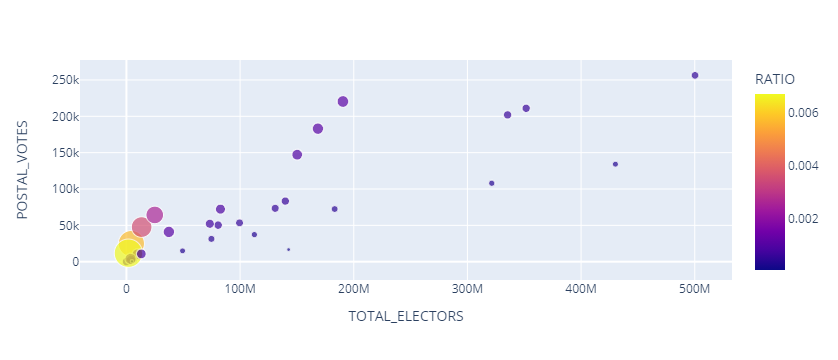

    index                      STATE  POSTAL_VOTES  TOTAL_ELECTORS     RATIO
0      17                Lakshadweep           106          165567  0.000640
1       8                Daman & Diu            26          486960  0.000053
2       0  Andaman & Nicobar Islands           200         1592355  0.000126
3      29                     Sikkim         11688         1736512  0.006731
4       7       Dadra & Nagar Haveli            58         1750203  0.000033
5       5                 Chandigarh           341         2586916  0.000132
6      24                   Nagaland          3856         3641331  0.001059
7      22                    Mizoram          2759         3962320  0.000696
8       2          Arunachal Pradesh         24952         4357603  0.005726
9       9                        Goa          1939         4544452  0.000427
10     26                 Puducherry           491         4867050  0.000101
11     21                  Meghalaya          2321         6461378  0.000359

In [611]:

q12=pd.merge(pd.DataFrame(df.groupby(['STATE'])['POSTAL_VOTES'].sum()).sort_values(by='STATE',ascending=True).reset_index(),pd.DataFrame(df.groupby(['STATE'])['TOTAL_ELECTORS'].sum()).sort_values(by='STATE',ascending=True).reset_index(),how='inner',on='STATE')
q12['RATIO']=q12['POSTAL_VOTES']/q12['TOTAL_ELECTORS']
fig= px.scatter(q12,x='TOTAL_ELECTORS',y='POSTAL_VOTES',size='RATIO',color='RATIO',hover_name='STATE')
fig.show()
print(q12.sort_values(by='TOTAL_ELECTORS',ascending=True).reset_index())
print('THERE IS NO RELATION B/W POSTAL VOTES AND ELECTORS')

### 13. What is the highest difference of votes between loosing and winning candidate?

### 14. What is the lowest difference of votes between loosing and winning candidate?

### 15. Which candidate has the lowest net assets? Which constituecy they belong to?

### 16. What is most wierdest party symbol? Which constituency and in which state is it?

### 17. Which party has only female or only male candidates?

In [288]:
qual= pd.DataFrame(df.groupby(['PARTY','GENDER'])['NAME'].nunique()).sort_values(by='NAME',ascending=False).reset_index()
#qual['NAME'].fillna(0,inplace=True)
qual=qual.set_index(['PARTY','GENDER'])['NAME'].unstack().fillna(0).reset_index()

print(qual[(qual['FEMALE']>0)&(qual['MALE']==0)]['PARTY'].nunique(),'Parties with ONLY Female Candidates \n',qual[(qual['FEMALE']>0)&(qual['MALE']==0)]['PARTY'])
print('\n',qual[(qual['MALE']>0)&(qual['FEMALE']==0)]['PARTY'].nunique(),'Parties with ONLY Male Candidates \n',qual[(qual['MALE']>0)&(qual['FEMALE']==0)]['PARTY'])


4 Parties with ONLY Female Candidates 
 7        AHNP
32       BOPF
51    JANADIP
85      PHJSP
Name: PARTY, dtype: object

 89 Parties with ONLY Male Candidates 
 2       ABGP
3      ABSKP
5        AGP
6      AHFBK
9       AIFB
       ...  
126     VSIP
127      WAP
128     WPOI
129      YKP
131     ravp
Name: PARTY, Length: 89, dtype: object


### 18. Which two or more parties have same symbol and what is the symbol?

In [269]:
q18=pd.DataFrame(df.groupby('PARTY')['SYMBOL'].nunique()).sort_values(by='SYMBOL',ascending=False).reset_index()
q18[q18['SYMBOL']>1]

,PARTY,SYMBOL
0,IND,65
1,VBA,3
2,SHS,3
3,SDPI,3
4,GGP,2
5,CPI(M),2
6,RAHIS,2


### 19. Which state has most 18+ voters registered?

### 20. How many candidates have Gandhi as surname? and How many of then have won in their constituency?

In [177]:
q=df[['NAME','CRIMINAL_CASES','TOTAL_VOTES','WINNER','CONSTITUENCY']]
q['NAME']=q['NAME'].apply(lambda x: x.upper())

q20=q[q['NAME'].str.contains('GANDHI')]

print('There are ',q20['NAME'].nunique(), ' candidates with GANDHI surname and ',q20[q20['WINNER']>0]['NAME'].nunique(), ' have won elections in their Constituencies')


There are  5  candidates with GANDHI surname and  4  have won elections in their Constituencies


C:\Users\anuj\AppData\Local\Temp/ipykernel_6676/927796664.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### 21. Are people voting or even considering the education of the candidate?

In [176]:
'same as q23'

'same as q23'

### 22. Are Voters considering the CRIMINAL and education status while voting?

C:\Users\anuj\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\anuj\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



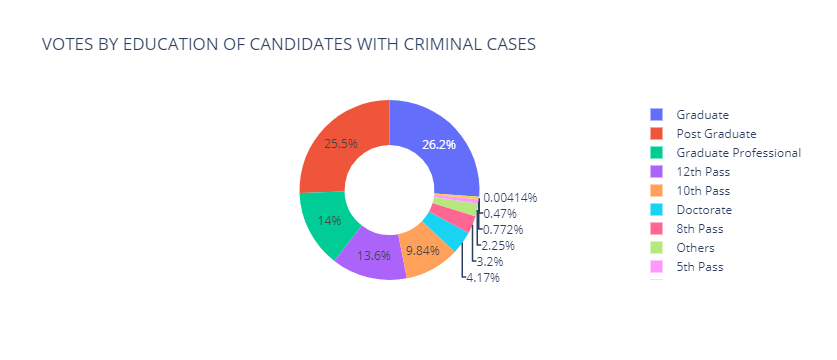

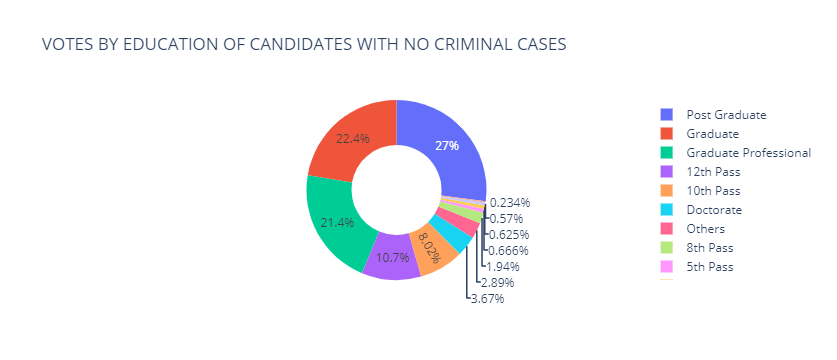

In [263]:
q=df[['NAME','CRIMINAL_CASES','EDUCATION','TOTAL_VOTES']]
q.loc[q['CRIMINAL_CASES'] >0, 'is_criminal'] = 'Yes'
q.loc[q['CRIMINAL_CASES'] ==0, 'is_criminal'] = 'No'


q22= pd.DataFrame(q.groupby(['EDUCATION','is_criminal'])['TOTAL_VOTES'].sum()).sort_values(by='TOTAL_VOTES').reset_index()

#px.bar(q22,x='TOTAL_VOTES',y='EDUCATION',orientation='h')

fig=px.pie(q22[q22['is_criminal']=='Yes'],names='EDUCATION',values='TOTAL_VOTES',title='VOTES BY EDUCATION OF CANDIDATES WITH CRIMINAL CASES',hole=0.5)
fig1= px.pie(q22[q22['is_criminal']=='No'],names='EDUCATION',values='TOTAL_VOTES',title='VOTES BY EDUCATION OF CANDIDATES WITH NO CRIMINAL CASES',hole=0.5)

fig.show()
fig1.show()

### 23. Check Hypothesis - High Qualified Candidates are getting more votes?

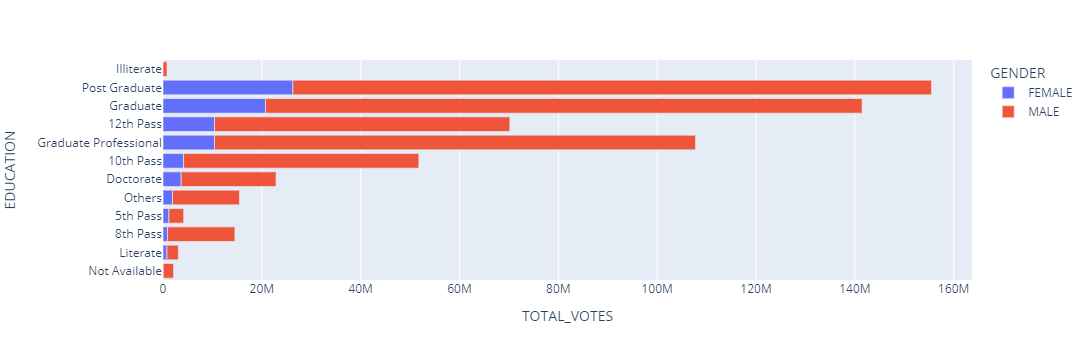

In [178]:
qual= pd.DataFrame(df.groupby(['EDUCATION','GENDER'])['TOTAL_VOTES'].sum()).sort_values(by='TOTAL_VOTES').reset_index()

px.bar(qual,x='TOTAL_VOTES',y='EDUCATION',color='GENDER',orientation='h')

### 24. Number of seats vs Number of Candidates?

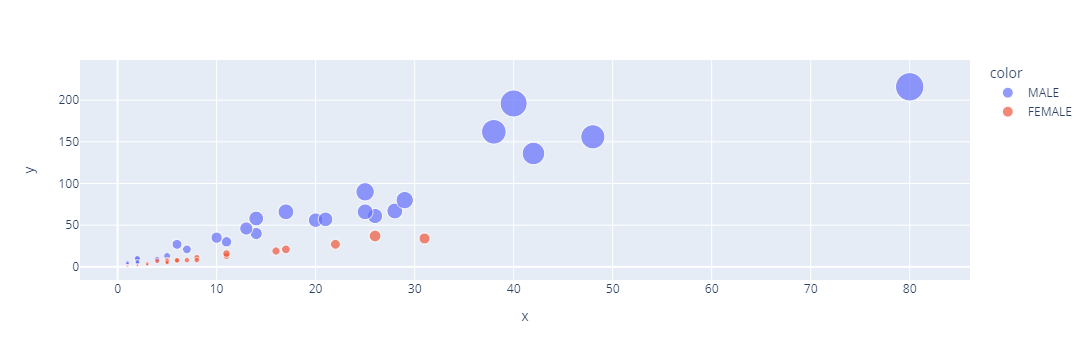

<Figure size 720x720 with 0 Axes>

In [77]:


seats = pd.DataFrame(df.groupby(['STATE','GENDER'])['CONSTITUENCY'].nunique()).reset_index()


candidates = pd.DataFrame(df.groupby(['STATE','GENDER'])['NAME'].nunique()).reset_index()

def addlabels(x,y,z):
    for i in range(len(x)):
        plt.text(x=x[i],y=y[i],s=z[i],fontsize=9,va='center',ha='right',color='black')

fig=plt.gcf()
fig.set_size_inches(10,10)
x=seats['CONSTITUENCY']
y=candidates['NAME']
z=seats['STATE']
a=seats['GENDER']

#plt.scatter(x=x,y=y)
px.scatter(x=x,y=y,size=y,hover_name=z,color=a)

#addlabels(x,y,z)
#plt.xlabel('# Constituencies')
#plt.ylabel('# Candidates')
#plt.title('Number of seats vs Number of Candidates')
